# Implementation of Multiple linear regression algorithm using python

Prepared by : Swaminathan Ayyappan 

Email : swamynathanayyappan@gmail.com

LinkedIn : linkedin.com/in/swaminathan-ayyappan-60b685175/

Concept of Linear regression :

              The linear regression algorithm was used to make the best fitting line for each and every points in the dataset.And for this the prediction is based upon the continuous values, we are implementing this algorithm.

Problem description :

In this section we are going to predict the profit of startup companies based upon multiple attributes like R&D Spend,Administration,Marketing spend,State. 

So we will be having an dataset which consists of Several startup company's profit with the above mentioned attributes.

Since the prediction is based upon continuous values we can use linear regression concept to solve this business problem 

And the data set contains :

i)R&D spend -> Funds spent for Research and develpoment.

ii)Administartion -> Funds spent for Administration purposes.

iii)Marketing spend -> Funds spent for marketing.

iv)State -> The state that where the company/branch is located.

v)Profit -> The profit which has been earned overall.

The dataset for this project is already posted on the github repository..

In [1]:
"""
i)Pandas - Used for handling dataset.

ii)numpy - stands for numerical python to handle arrays.

iii)matplotlib - To visualize our dataset and here 'pyplot' refers to making of statistical plots.

iv)seaborn - Advanced visualization library than matplotlib helps to visualize the dataset.

Note :

The %matplotlib inline helps to visualize the plots within the notebook itself.

"""
#Importing libraries like pandas,numpy,matplotlib and seaborn and their explanations are given below.
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline  

In [2]:
#Importing the startups datset into a single variable(startups) with the help of pandas.
startups=pd.read_csv('F:/STUDY MATERIALS/[FreeCourseSite.com] Udemy - Machine Learning A-Z™ Hands-On Python & R In Data Science/Datasets/Machine Learning A-Z New/Part 2 - Regression/Section 5 - Multiple Linear Regression/50_Startups.csv')

In [3]:
#Viewing the first five entries of the startups dataset.
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#provides entire information of the startups dataset.
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#given entire description of the numerical values of the startups dataset.
#Provides the occurence,mean,standard deviation,minimum,maximum,and interquartile ranges (25% , 50%, 75%) of startups dataset attributes.
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
#Viewing the last five entries of the startups dataset.
startups.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [7]:
#Displaying the column names / attributes of the startups dataset. 
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
#To know about the number of rows and columns of the startups dataset. 
startups.shape

(50, 5)

In [9]:
#To verify any null values present of the startups dataset. 
startups.isna().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [10]:
#To know about the each value's presence in the particular column (R&D spend) of the startups dataset.
#And as we can see there are two zero entries in the particular column (R&D spend) of our startups dataset.
startups['R&D Spend'].value_counts()

0.00         2
123334.88    1
165349.20    1
38558.51     1
46014.02     1
20229.59     1
130298.13    1
55493.95     1
542.05       1
91992.39     1
65605.48     1
23640.93     1
162597.70    1
131876.90    1
67532.53     1
61136.38     1
119943.24    1
76253.86     1
72107.60     1
28663.76     1
44069.95     1
66051.52     1
78013.11     1
91749.16     1
27892.92     1
93863.75     1
100671.96    1
1315.46      1
134615.46    1
28754.33     1
78389.47     1
153441.51    1
46426.07     1
114523.61    1
22177.74     1
101913.08    1
63408.86     1
15505.73     1
64664.71     1
77044.01     1
86419.70     1
120542.52    1
144372.41    1
73994.56     1
142107.34    1
94657.16     1
75328.87     1
61994.48     1
1000.23      1
Name: R&D Spend, dtype: int64

In [11]:
#To know about the each value's presence in the particular column (Administration) of the startups dataset.
#There are no zero entries in the particular column/attribute (Administration) of our startups dataset.
startups['Administration'].value_counts()

127382.30    1
148718.95    1
51743.15     1
153514.11    1
82982.09     1
110594.11    1
91391.77     1
129219.61    1
154806.14    1
84710.77     1
147198.87    1
96189.63     1
85047.44     1
121597.55    1
118671.85    1
51283.14     1
157693.92    1
113867.30    1
105751.03    1
153773.43    1
127320.38    1
127864.55    1
115816.21    1
101145.55    1
118546.05    1
127056.21    1
151377.59    1
145530.06    1
103057.49    1
182645.56    1
122782.75    1
124153.04    1
116983.80    1
153032.06    1
144135.98    1
145077.58    1
135495.07    1
139553.16    1
99814.71     1
114175.79    1
136897.80    1
91790.61     1
152701.92    1
108679.17    1
115641.28    1
156547.42    1
122616.84    1
65947.93     1
135426.92    1
99281.34     1
Name: Administration, dtype: int64

In [12]:
#To know about the each value's presence in the particular column (Marketing Spend) of the startups dataset.
#And as we can see there are three zero entries of our column/attribut (Marketing Spend) of our startups dataset.
startups['Marketing Spend'].value_counts()

0.00         3
46085.25     1
383199.62    1
107138.38    1
205517.64    1
443898.53    1
174999.30    1
197029.42    1
140574.81    1
366168.42    1
45173.06     1
118148.20    1
362861.36    1
134050.07    1
323876.68    1
282574.31    1
127716.82    1
185265.10    1
172795.67    1
304981.62    1
298664.47    1
1903.93      1
148001.11    1
210797.67    1
28334.72     1
35534.17     1
261776.23    1
299737.29    1
303319.26    1
164470.71    1
229160.95    1
304768.73    1
471784.10    1
311613.29    1
294919.57    1
407934.54    1
88218.23     1
264346.06    1
249839.44    1
214634.81    1
201126.82    1
252664.93    1
353183.81    1
91131.24     1
297114.46    1
137962.62    1
249744.55    1
256512.92    1
Name: Marketing Spend, dtype: int64

In [13]:
#To know about the each value's presence in the particular column (R&D spend) of the startups dataset.
#As we can see it is column/attribute (State) that contains categorical values in our startups dataset.
#So for this particular attribute we need to create dummy variables since linear regression accepts only continuous values (numerical).
startups['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [14]:
#To know about the each value's presence in the particular column (R&D spend) of the dataset.
#There are no zero entries in the column/attribute (Profit) from our startups dataset.
startups['Profit'].value_counts()

118474.03    1
69758.98     1
81229.06     1
101004.64    1
124266.90    1
49490.75     1
192261.83    1
71498.49     1
156991.12    1
108733.99    1
78239.91     1
64926.08     1
144259.40    1
108552.04    1
97427.84     1
126992.93    1
105733.54    1
96712.80     1
96479.51     1
134307.35    1
99937.59     1
90708.19     1
182901.99    1
110352.25    1
42559.73     1
146121.95    1
89949.14     1
152211.77    1
35673.41     1
156122.51    1
166187.94    1
65200.33     1
149759.96    1
155752.60    1
191792.06    1
125370.37    1
107404.34    1
14681.40     1
111313.02    1
81005.76     1
105008.31    1
103282.38    1
132602.65    1
129917.04    1
122776.86    1
96778.92     1
77798.83     1
141585.52    1
191050.39    1
97483.56     1
Name: Profit, dtype: int64

In [15]:
#To understand about the correlation between each attributes in the startups dataset.
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


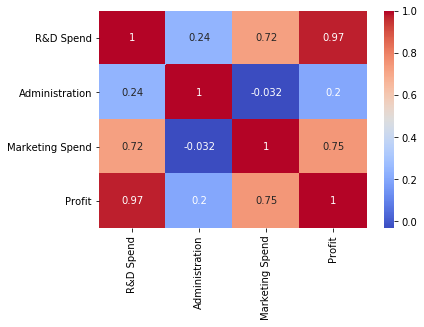

In [16]:
#To visualize the correlation of the attributes present inside the startups dataset using a heatmap.
sns.heatmap(startups.corr(),annot=True,cmap='coolwarm')
plt.show()

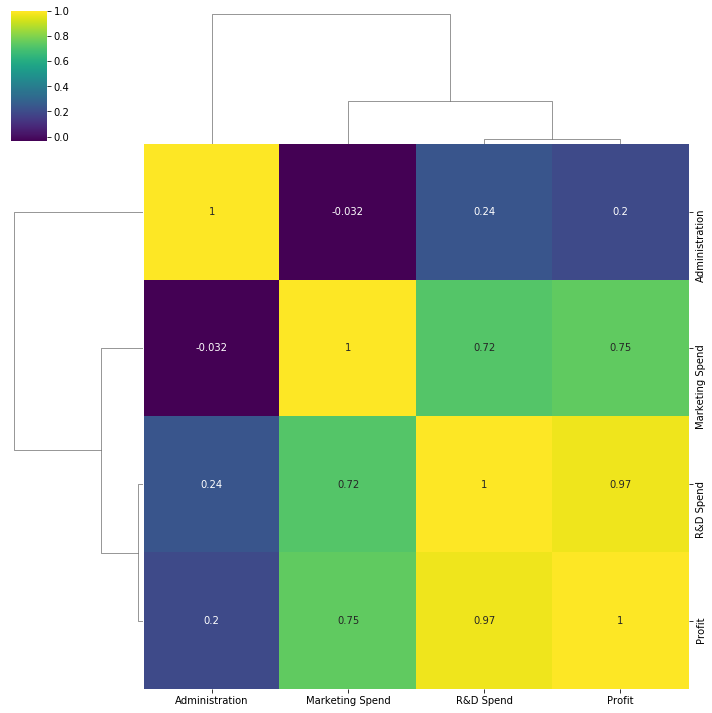

In [17]:
#To visualize the correlation of the attributes present inside the startups dataset using a heatmap.
sns.clustermap(startups.corr(),cmap='viridis',annot=True)
plt.show()

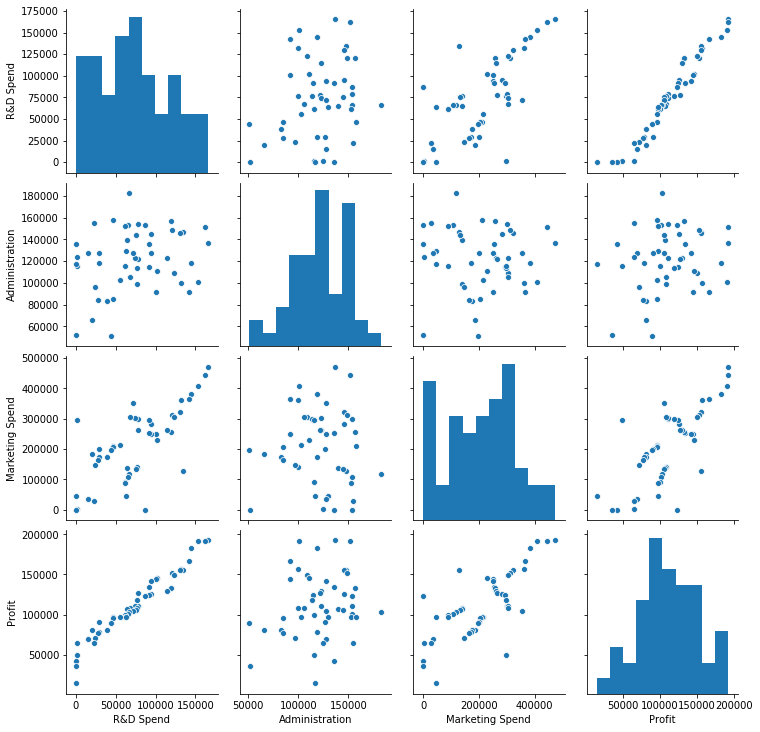

In [18]:
#To create a pair plot of the every numerical values in the startups dataset.
sns.pairplot(startups)
plt.show()

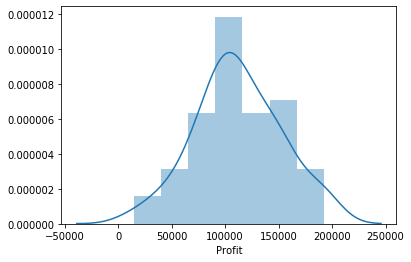

In [19]:
#To create a ditance plot of the Profit column in the startups dataset
sns.distplot(startups['Profit'])
plt.show()

# Creation of dummy variables for categorical columns in the dataset.

In [20]:
#Creating the dummy variable for state column in our startups dataset.
#We can achieve this by two methods by using pandas in built get_dummies method or by using oneHotEncoder , LabelledEncoder
#So in this scenario we are using pandas in-built get_dummies method.
dummy=pd.get_dummies(startups['State']) #Assigning dummy variables to the variable named as dummy. 

In [21]:
#Displays the first five datas present in the dummy dataset.
dummy.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


# Dummy variable trap

Dummy variable trap is defined as eleminating one of the features/columns/attributes in out dummy dataset such in a way that our model will make predictions better as we expected.

In [22]:
#We are going to drop 'Florida' column in our dummy dataset inorder to avoid dummy variable trap.
dummy.drop('Florida',axis=1,inplace=True)

In [23]:
#reviewing the columns in our dummy dataset after removal of 'Florida' column.
dummy.columns

Index(['California', 'New York'], dtype='object')

As we can see that the 'florida' column was omitted from our dummy dataset.Followed by that we want to remove the state column in our startups dataset.

In [24]:
#Dropping the 'State' column from our startups dataset.
startups.drop('State',axis=1,inplace=True)

In [25]:
#reviewing the columns in our startups dataset after removal of 'State' column.
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

As we can see that the 'State' column was omitted from our startups dataset.Followed by that we want to perform the concatenation of dummy and startups dataset.

# Concatenation of dummy dataset with startups dataset

In [26]:
#Concatenating the dummy and startups dataset together using pandas concat method.
startups=pd.concat([dummy,startups],axis=1)

In [27]:
#Reviewing the first five entries of our concatenated startups dataset.
startups.head(5)

,California,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,162597.70,151377.59,443898.53,191792.06
2,0,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,0,0,142107.34,91391.77,366168.42,166187.94


# Dependent and Indpendent variable allocation

Inorder to execute Machine learning algorithm we want to seperate the dependent and independent values in the dataset

where,

X->Independent variable

y->Dependent variable

So in our datset the 'Profit' is purely dependent on the 'R&D Spend','Administration','Marketing Spend' so in this case we need to allocate Profit for X variable and the rest of the variables to y variable.

In [28]:
X=startups.iloc[:,[0,1,2,3,4]] # 2 Dimensional array that holds the value of 'California','New York','R&D Spend', 'Administration', 'Marketing Spend' from the startups dataset.
y=startups.iloc[:,[5]] # 2 Dimensional array that holds the value of 'Profit' from the startups dataset.

# Train and Test split

The dependent and independent variables are splitted into training and test data for fitting into our model

In [29]:
#Importing train_test_split class from scikit learn library under model_selection package.
from sklearn.model_selection import train_test_split

In [30]:
# Splits the dependent and independent variable into training and test data by the use of train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Importing LinearRegression class from scikit learn (sklearn) library

In [31]:
#Importing LinearRegression class from scikitlearn(sklearn) library under linear_model package.
from sklearn.linear_model import LinearRegression

In [32]:
#instatntiate our model (Creating an object for the Linear regression class).
lr=LinearRegression() 

# Fitting the training data / Training our model

In [33]:
#Train our model by fitting the training data into it.
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Finding accuracy of our trained model

i)Using score method

In [34]:
#Predicting the performance/score of our linear regression model.
print(lr.score(X_test,y_test)*100,'%')

92.41937845118973 %


In [35]:
#Importing Root mean squared error (RMSE) and Mean absolute error (MAE) class from scikit learn library under metrics package. 
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [36]:
#Assigning the test data to a variable using predict method.
y_pred=lr.predict(X_test)

ii)Using Mean Squared Error (MSE) :

In [37]:
#Prints the mean squared error (MSE) for our test data and predicted data.
print(mean_squared_error(y_test,y_pred))

110145720.56762388


iii)Using Mean Absolute Error (MAE):

In [38]:
#Prints the mean absolute error (MAE) for our test data and predicted data.
print(mean_absolute_error(y_test,y_pred))

8353.874382738819


iv)Using Mean Squared Error (MSE):

In [39]:
#Prints the root mean squared error (RMSE) for our test data and predicted data.
print(np.sqrt(mean_squared_error(y_test,y_pred)))

10495.03313799551


v)Creating a distance plot 

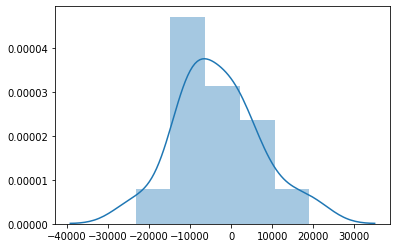

In [40]:
#The visualization looks like an mountain peek, well it indicates the model is perfect enough to make predictions.
sns.distplot(y_test-y_pred)
plt.show()

# Making predictions :

In [41]:
cal=int(input('If the company was in California then give 1 as input else give 0 as input :'))
new=int(input('If the company was in New york then give 1 as input else give 0 as input :'))
rd=float(input('Enter the amount spend for research and development (R&D) purpose :'))
ad=float(input('Enter the amount spend for administration purpose :'))
ms=float(input('Enter the amount spend for marketing spend :'))
print()
print("-----Predicted Results for given inputs-----")
print()
if cal==1:
    print('The company was located in California')
    print()
    print('The profit of the company is about : $',float(lr.predict([[cal,new,rd,ad,ms]])))
if new==1:
        print("The company was located in New York")
        print()
        print('The profit of the company is about : $',float(lr.predict([[cal,new,rd,ad,ms]])))
if cal==0 and new==0:
        print("The company was located in Florida")
        print()
        print('The profit of the company is about : $',float(lr.predict([[cal,new,rd,ad,ms]])))
if cal==1 and new==1:
        print("The company was located in both Florida and New York")
        print()
        print('The profit of the company is about : $',float(lr.predict([[cal,new,rd,ad,ms]])))
if (cal!=0 and cal!=1) or (new!=0 and new!=1):
    print('Your inputs for states is not correct')

If the company was in California then give 1 as input else give 0 as input :0
If the company was in New york then give 1 as input else give 0 as input :1
Enter the amount spend for research and development (R&D) purpose :455626535
Enter the amount spend for administration purpose :548626
Enter the amount spend for marketing spend :546598

-----Predicted Results for given inputs-----

The company was located in New York

The profit of the company is about : $ 365123409.6736762
